Mounting Google Drive

In [ ]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Importing Necessary Modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE

Reading Data

In [ ]:
test = pd.read_csv("/gdrive/MyDrive/CIS508/Santander/Santander Customer Satisfaction - TEST-Without TARGET.csv")
training = pd.read_csv("/gdrive/MyDrive/CIS508/Santander/Santander Customer Satisfaction - TRAIN.csv")

Performing EDA on the data

In [ ]:
training.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [ ]:
print("Training Shape", training.shape)
print("--------------")
print("Test shape", test.shape)

Training Shape (76020, 371)
--------------
Test shape (75818, 370)


In [ ]:
training.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(training.columns.values)
TestCols = list(test.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
#Removing 'Target' column

Xtrain = training[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = training[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = test.copy()

(76020, 370)
(76020, 1)


Printing the distribution of target class values

In [ ]:
training["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

Performing **Feature Selection** using

*   Variance Threshold: Removing constant columns
*   Correlation matrix: Removing highly correlated columns

The objective is to provide only important columns to the classifier to avoid over-fitting.



In [ ]:
# test = pd.read_csv("/gdrive/MyDrive/CIS508/Santander/Santander Customer Satisfaction - TEST-Without TARGET.csv")
# training = pd.read_csv("/gdrive/MyDrive/CIS508/Santander/Santander Customer Satisfaction - TRAIN.csv")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.2 , random_state = 1, stratify = Ytrain)

In [ ]:
# X_test.shape

In [ ]:
# X_train

Removing columns using Variance Threshold

In [ ]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
#In the below code, true indicates that a particular feature is
# very important and false indicates that a particular feature is
# not so important with respect to the target feature.
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_threshold.get_support()]]
# Printing constant columns
for column in constant_columns:
    print(column)
print(len(constant_columns))
            

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
delta_imp_trasp_var33_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
imp_trasp_var33_out_ult1
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
num_trasp_var33_out_ult1
saldo_var2_ult1
saldo_medio_var13_medio_hace3
38


In [ ]:
# Drop constant columns
X_train_removed =  X_train.drop(constant_columns,axis=1).copy()
X_test_removed = X_test.drop(constant_columns, axis = 1).copy()

In [ ]:
X_train_removed.shape

(60816, 332)

In [ ]:
X_test_removed.shape

(15204, 332)

Now, we will remove features with high correlation

In [ ]:
X_train_removed.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.000524,-0.001064,-0.001886,-0.001395,-0.003335,-0.005684,-0.005133,-0.006947,-0.007025,...,-0.008729,0.000442,0.004143,-0.002854,-0.002425,-0.002119,-0.002806,0.000668,0.001870,-0.003332
var3,-0.000524,1.000000,-0.005847,0.002089,0.005310,0.006282,0.001532,0.001700,0.000564,0.000657,...,0.000222,0.000729,0.000524,0.000632,0.000671,0.000830,0.000472,0.000828,0.000791,0.000026
var15,-0.001064,-0.005847,1.000000,0.046300,0.092622,0.099926,0.042261,0.048021,0.009709,0.010699,...,0.008502,0.029390,0.018348,0.028446,0.029375,0.039350,0.012997,0.038447,0.035112,0.006620
imp_ent_var16_ult1,-0.001886,0.002089,0.046300,1.000000,0.048642,0.041472,0.006112,0.008149,0.000883,0.003490,...,0.018669,-0.001026,-0.000806,-0.000575,-0.000569,0.007122,-0.000652,0.010255,0.011157,0.000886
imp_op_var39_comer_ult1,-0.001395,0.005310,0.092622,0.048642,1.000000,0.883794,0.346706,0.295835,0.036059,0.061484,...,0.003601,0.017736,0.012609,0.012648,0.014068,0.022494,0.007622,0.021095,0.016383,0.016633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.002119,0.000830,0.039350,0.007122,0.022494,0.020325,-0.000478,-0.000706,-0.000310,-0.000361,...,0.013042,0.002802,-0.000275,0.006754,0.005993,1.000000,0.230040,0.695179,0.599183,0.005370
saldo_medio_var44_hace3,-0.002806,0.000472,0.012997,-0.000652,0.007622,0.008770,-0.000463,-0.000508,-0.000173,-0.000201,...,-0.000068,-0.000213,-0.000153,-0.000186,-0.000196,0.230040,1.000000,0.149916,0.127051,0.003742
saldo_medio_var44_ult1,0.000668,0.000828,0.038447,0.010255,0.021095,0.019305,-0.000050,-0.000456,-0.000310,-0.000360,...,0.029411,0.001557,-0.000275,0.003980,0.003510,0.695179,0.149916,1.000000,0.977807,0.005413
saldo_medio_var44_ult3,0.001870,0.000791,0.035112,0.011157,0.016383,0.014880,-0.000246,-0.000552,-0.000296,-0.000344,...,0.020546,0.001522,-0.000263,0.003881,0.003423,0.599183,0.127051,0.977807,1.000000,0.004225


In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_removed.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

NameError: ignored

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
high_cor_col = correlation(X_train_removed, 0.8)

In [ ]:
# Number of columns to be removed
len(high_cor_col)

202

In [ ]:
X_train_v3 = X_train_removed.drop(high_cor_col,axis=1).copy()
X_test_v3 = X_test_removed.drop(high_cor_col,axis=1).copy()

In [ ]:
X_train_v3.shape

(60816, 130)

In [ ]:
Y_train.shape
Y_train.value_counts()

TARGET
0         58410
1          2406
dtype: int64

In [ ]:
X_test_v3.shape

(15204, 130)

In [ ]:
Y_test.shape

(15204, 1)

To handle the under-representation of the target class, we will perform either:


*  Undersampling
*  Oversampling





In [ ]:
# instantiating the random undersampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy= 1) 
# resampling X, y
X_rus, Y_rus = rus.fit_resample(X_train_v3, Y_train)
# new class distribution
X_rus.shape

(4812, 130)

In [ ]:
# # SMOTE
# sm = SMOTE(random_state= 42, sampling_strategy = 0.5)
# X_res, y_res = sm.fit_resample(X_train_v3, Y_train)
# X_res.shape

In [ ]:
# y_res.shape
# y_res.value_counts()

In [ ]:
Y_rus["TARGET"].value_counts()

0    2406
1    2406
Name: TARGET, dtype: int64

In [ ]:
Y_rus.shape

(4812, 1)

In [ ]:
X_test_v3.shape

(15204, 130)

In [ ]:
Y_test.shape

(15204, 1)

Creating a decision tree classifier and training it
Changes made over a default classifier:


*   Splitting criterion changed to "Entropy" instead of "Gini"
*   Max number of leaf nodes changed to 20



In [ ]:
#dt_v7 = DecisionTreeClassifier(criterion = "entropy", max_depth=50, class_weight={0:1,1:6.6})

dt = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=20)


#Using Undersampling
dt = dt.fit(X_rus, Y_rus)


#Using SMOTE
#dt_v7 = dt_v7.fit(X_res, y_res)


#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test_v3)
Y_new = dt.predict(X_rus)

#Model Accuracy
print("Training Accuracy:", metrics.accuracy_score(Y_rus, Y_new))
print("Testing Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

Training Accuracy: 0.755195344970906
Testing Accuracy: 0.7864377795317021


Plotting the DT

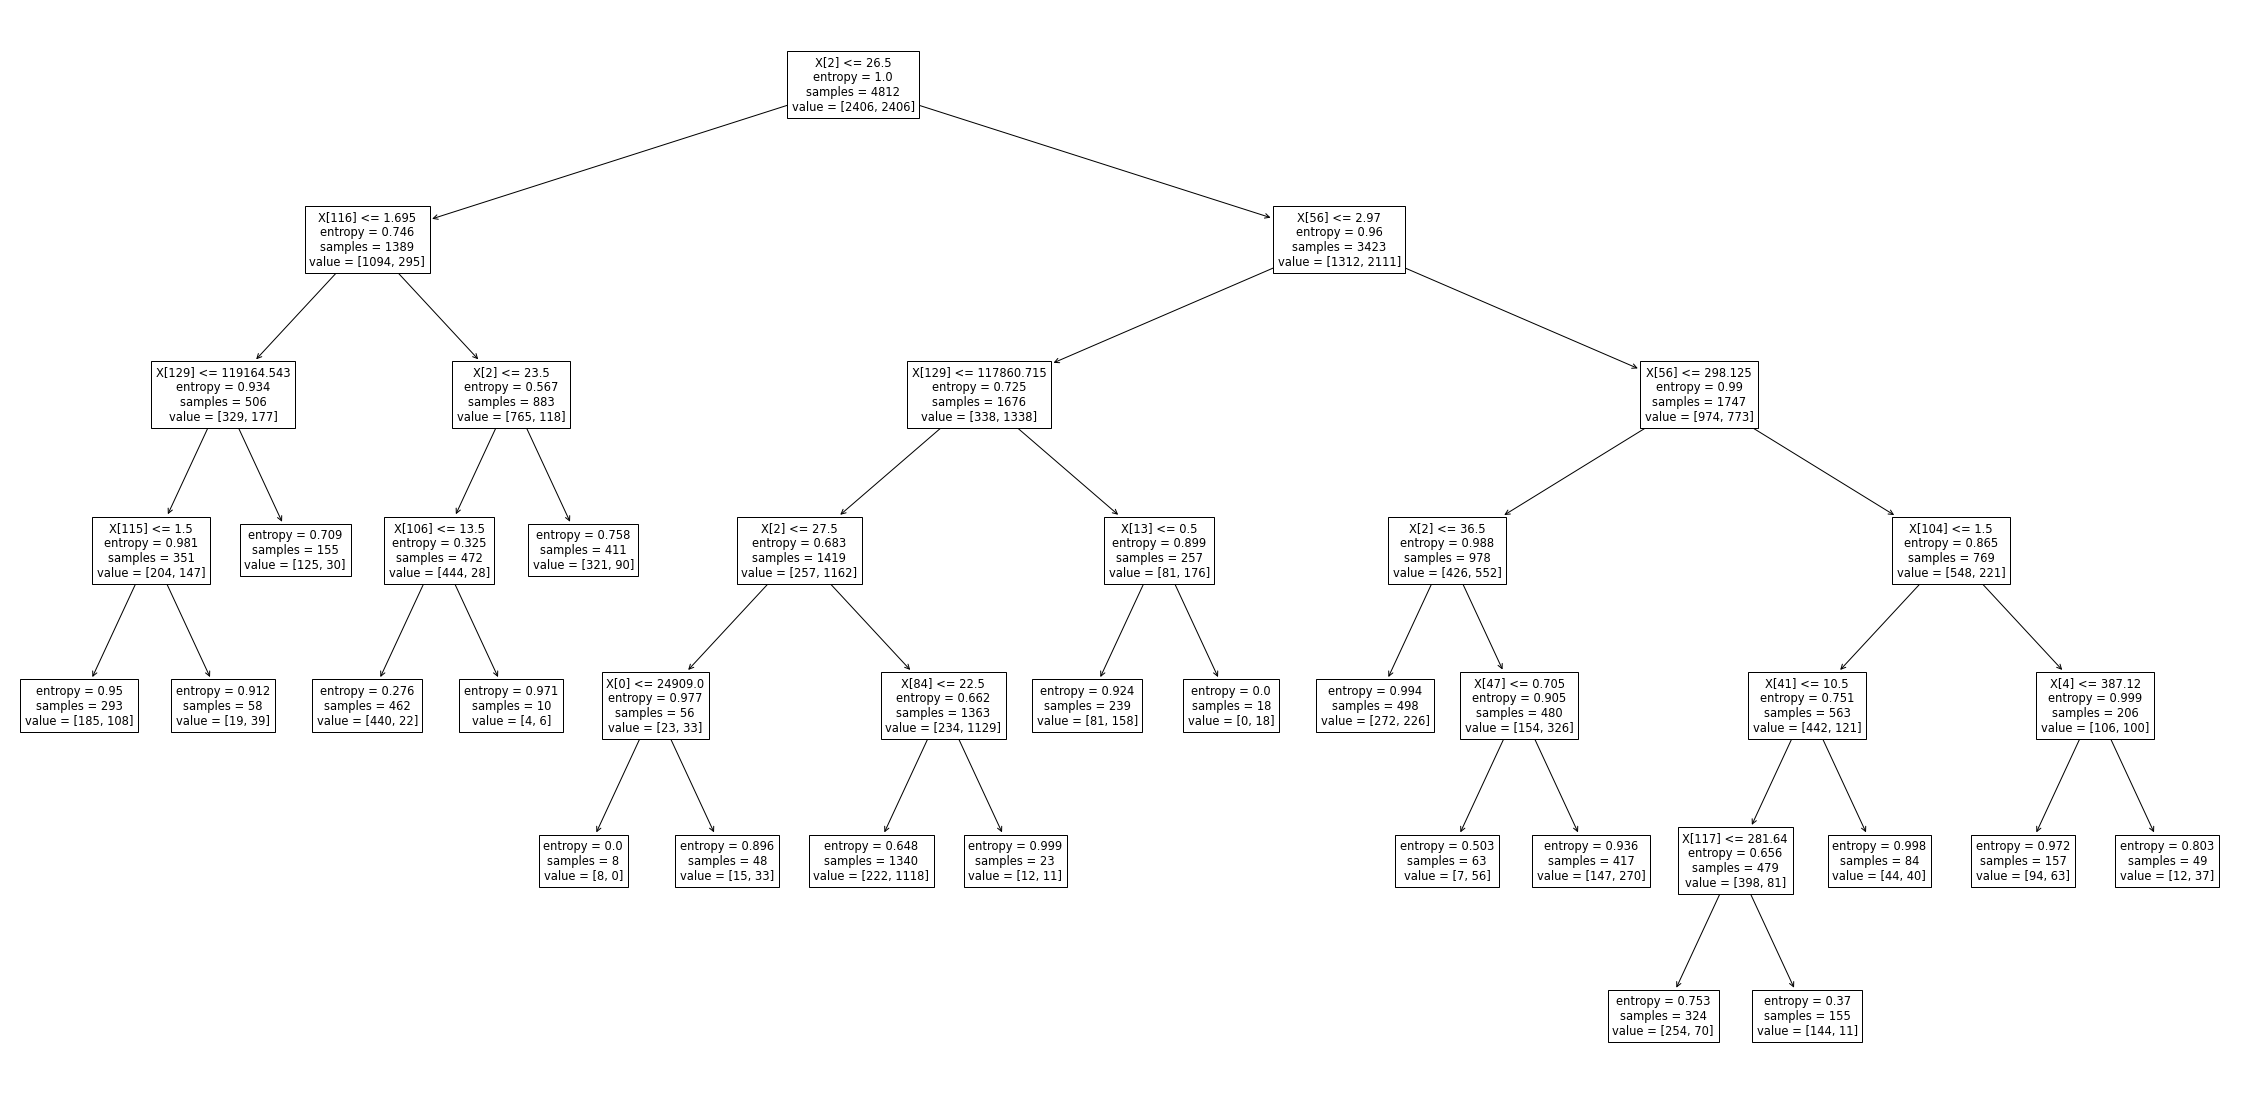

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(dt)

Calculating Scores and Confusion matrix

In [ ]:
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[11538  3064]
 [  183   419]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     14602
           1       0.12      0.70      0.21       602

    accuracy                           0.79     15204
   macro avg       0.55      0.74      0.54     15204
weighted avg       0.95      0.79      0.85     15204



In [ ]:
X_test_removed =  test.drop(constant_columns,axis=1).copy()
X_test_v3 =  X_test_removed.drop(high_cor_col,axis=1)
X_test_v3

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,40532.100
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,45486.720
2,6,2,23,0.0,0.0,0.0,0.0,0.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,46993.950
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,187898.610
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,73649.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,40243.200
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,146961.300
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,167299.770
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,117310.979


Submitting to Kaggle

In [ ]:
predictions = dt.predict(X_test_v3)
sample_submission = pd.read_csv("/gdrive/MyDrive/CIS508/Santander/sample_submission (1).csv")
sample_submission['TARGET'] = predictions
sample_submission.to_csv("/gdrive/MyDrive/CIS508/Santander/submission.csv",index=False)